# **Figure 1.** Dispersions
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 04/24/2022          |
| Updated | 09/28/2022          |

## Dispersion Equivalence

We define the time-dependent gas density dispersion by
\begin{equation}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\delta\rho_\mathrm{g}^2\rangle - \langle\delta\rho_\mathrm{g}\rangle^2},
    \tag{1}
\end{equation}
where
\begin{equation}
    \langle g^n \rangle \equiv \frac{1}{L_x L_y L_z}\iiint g^n \mathrm{d}x\mathrm{d}y\mathrm{d}z
    \tag{2}
\end{equation}
is the volume average of time-dependent gas quantity $g$ over the computational domain and $\delta\rho_\mathrm{g} \equiv \rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle$ is the time-dependent local gas density deviation from the time-independent volume average, $\langle\rho_\mathrm{g}\rangle = \rho_\mathrm{g,0}$.
With $V \equiv L_x L_y L_z$, $\mathrm{d}V \equiv\mathrm{d}x\mathrm{d}y\mathrm{d}z $,
\begin{align}
    \langle\delta\rho_\mathrm{g}\rangle &= \frac{1}{V}\int(\rho_\mathrm{g} - \langle\rho_\mathrm{g}\rangle)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}\mathrm{d}V - \langle\rho_\mathrm{g}\rangle \\
    &= \langle\rho_\mathrm{g}\rangle - \langle\rho_\mathrm{g}\rangle = 0,
    \tag{3}
\end{align}
and
\begin{align}
    \langle\delta\rho_\mathrm{g}^2\rangle &= \frac{1}{V}\int(\rho_\mathrm{g}^2 - 2\rho_\mathrm{g}\langle\rho_\mathrm{g}\rangle + \langle\rho_\mathrm{g}\rangle^2)\mathrm{d}V \\
    &= \frac{1}{V}\int\rho_\mathrm{g}^2 \mathrm{d}V - \frac{2}{V}\langle\rho_\mathrm{g}\rangle\int\rho_\mathrm{g} \mathrm{d}V + \langle\rho_\mathrm{g}\rangle^2 \\
    &= \langle\rho_\mathrm{g}^2\rangle - 2\langle\rho_\mathrm{g}\rangle^2 + \langle\rho_\mathrm{g}\rangle^2 \\ 
    &= \langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2,
    \tag{4}
\end{align}
we can rewrite Eq. (1) as
\begin{equation}
    \sigma_{\rho_\mathrm{g}} = \sqrt{\langle\rho_\mathrm{g}^2\rangle - \langle\rho_\mathrm{g}\rangle^2}.
    \tag{5}
\end{equation}

In [11]:
def std_err_par(val, err, base_exp, dec_not=False):
    """
    Formats value-error pair using parenthesis notation.

    *** scientific notation in TeX.

    Parameters
    ----------
    val : float
        ***
    err : float
        ***
    base_exp : int
        ***
    dec_not : bool, optional
        If False, 

    Returns
    -------
    entry
        ***
    """
    val_str, err_str = f'{val:e}', f'{err:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff >= 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    if dec_not:
        return f'{val_sig}({err_1st})'
    else:
        return f'${val_sig}({err_1st})\\times 10^{exp_str}$'

vals = [1.23456789e0, 2.345678901e9, 1.8494637e-03]#, 9.876543210e-04]
errs = [5.678901234e-2, 9.012345678e6, 2.345816e-05]#, 5.678901234e-03]
for i, val in enumerate(vals):
    print(std_err_par(val, errs[i]))

1.23(6) \times 10^{0}
2.346(9) \times 10^{9}
1.85(2) \times 10^{-3}


In [ ]:
import numpy as np

vals = [1.23456789e0, 2.345678901e9, 1.8494637e-03]#, 9.876543210e-04]
errs = [5.678901234e-2, 9.012345678e6, 2.345816e-05]#, 5.678901234e-03]
for i, val in enumerate(vals):
    val_str, err_str = f'{val:e}', f'{errs[i]:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff > 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    print(f'{val:e} ± {errs[i]:e} ≈ {val_sig}({err_1st}) \\times 10^{exp_str}')

1.234568e+00 ± 5.678901e-02 ≈ 1.23(6) \times 10^{0}
2.345679e+09 ± 9.012346e+06 ≈ 2.346(9) \times 10^{9}
1.849464e-03 ± 2.345816e-05 ≈ 1.85(2) \times 10^{-3}


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)
<ipython-input-2-39c88fcb8836>:182: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(buf='tabs/disps.sty')


,Case,$\Pi$,$\overline{\sigma_{\rhop}}/\rhogn$,$\overline{\sigma_{v_x}}/\cs$,$\overline{\sigma_{v_y}}/\cs$,$\overline{\sigma_{v_z}}/\cs$,$\overline{\sigma_{\rhog}}/\rhogn$,$\overline{\sigma_{u_x}}/\cs$,$\overline{\sigma_{u_y}}/\cs$,$\overline{\sigma_{u_z}}/\cs$
0,AB,0.01,1.97(2) \times 10^{0},1.84(2) \times 10^{-3},1.31(5) \times 10^{-3},1.53(2) \times 10^{-3},7.5(3) \times 10^{-6},2.28(3) \times 10^{-3},1.40(5) \times 10^{-3},1.68(3) \times 10^{-3}
1,AB,0.02,1.936(7) \times 10^{0},3.53(4) \times 10^{-3},2.11(4) \times 10^{-3},2.77(5) \times 10^{-3},2.32(6) \times 10^{-5},4.39(5) \times 10^{-3},2.25(4) \times 10^{-3},3.10(5) \times 10^{-3}
2,AB,0.05,1.88(2) \times 10^{0},8.5(2) \times 10^{-3},4.7(3) \times 10^{-3},6.7(3) \times 10^{-3},1.27(7) \times 10^{-4},1.06(3) \times 10^{-2},5.0(4) \times 10^{-3},7.6(3) \times 10^{-3}
3,AB,0.10,1.87(4) \times 10^{0},1.7(1) \times 10^{-2},10.(1) \times 10^{-3},1.28(10) \times 10^{-2},4.9(6) \times 10^{-4},2.1(1) \times 10^{-2},1.0(1) \times 10^{-2},1.5(1) \times 10^{-2}
4,BA,0.01,1.4(6) \times 10^{0},3.5(2) \times 10^{-3},1.8(2) \times 10^{-3},1.2(4) \times 10^{-2},6.(3) \times 10^{-4},2.1(9) \times 10^{-3},4.7(9) \times 10^{-3},1.0(2) \times 10^{-2}
5,BA,0.02,1.2(4) \times 10^{0},7.2(6) \times 10^{-3},3.6(4) \times 10^{-3},2.3(8) \times 10^{-2},1.2(5) \times 10^{-3},4.5(4) \times 10^{-3},8.(1) \times 10^{-3},1.8(4) \times 10^{-2}
6,BA,0.05,5.(2) \times 10^{-1},1.7(2) \times 10^{-2},8.(1) \times 10^{-3},3.3(8) \times 10^{-2},2.2(6) \times 10^{-3},1.17(9) \times 10^{-2},1.6(3) \times 10^{-2},3.3(7) \times 10^{-2}
7,BA,0.10,3.8(3) \times 10^{-1},3.2(4) \times 10^{-2},1.6(2) \times 10^{-2},5.8(10) \times 10^{-2},5.3(8) \times 10^{-3},2.4(2) \times 10^{-2},2.8(3) \times 10^{-2},6.0(9) \times 10^{-2}


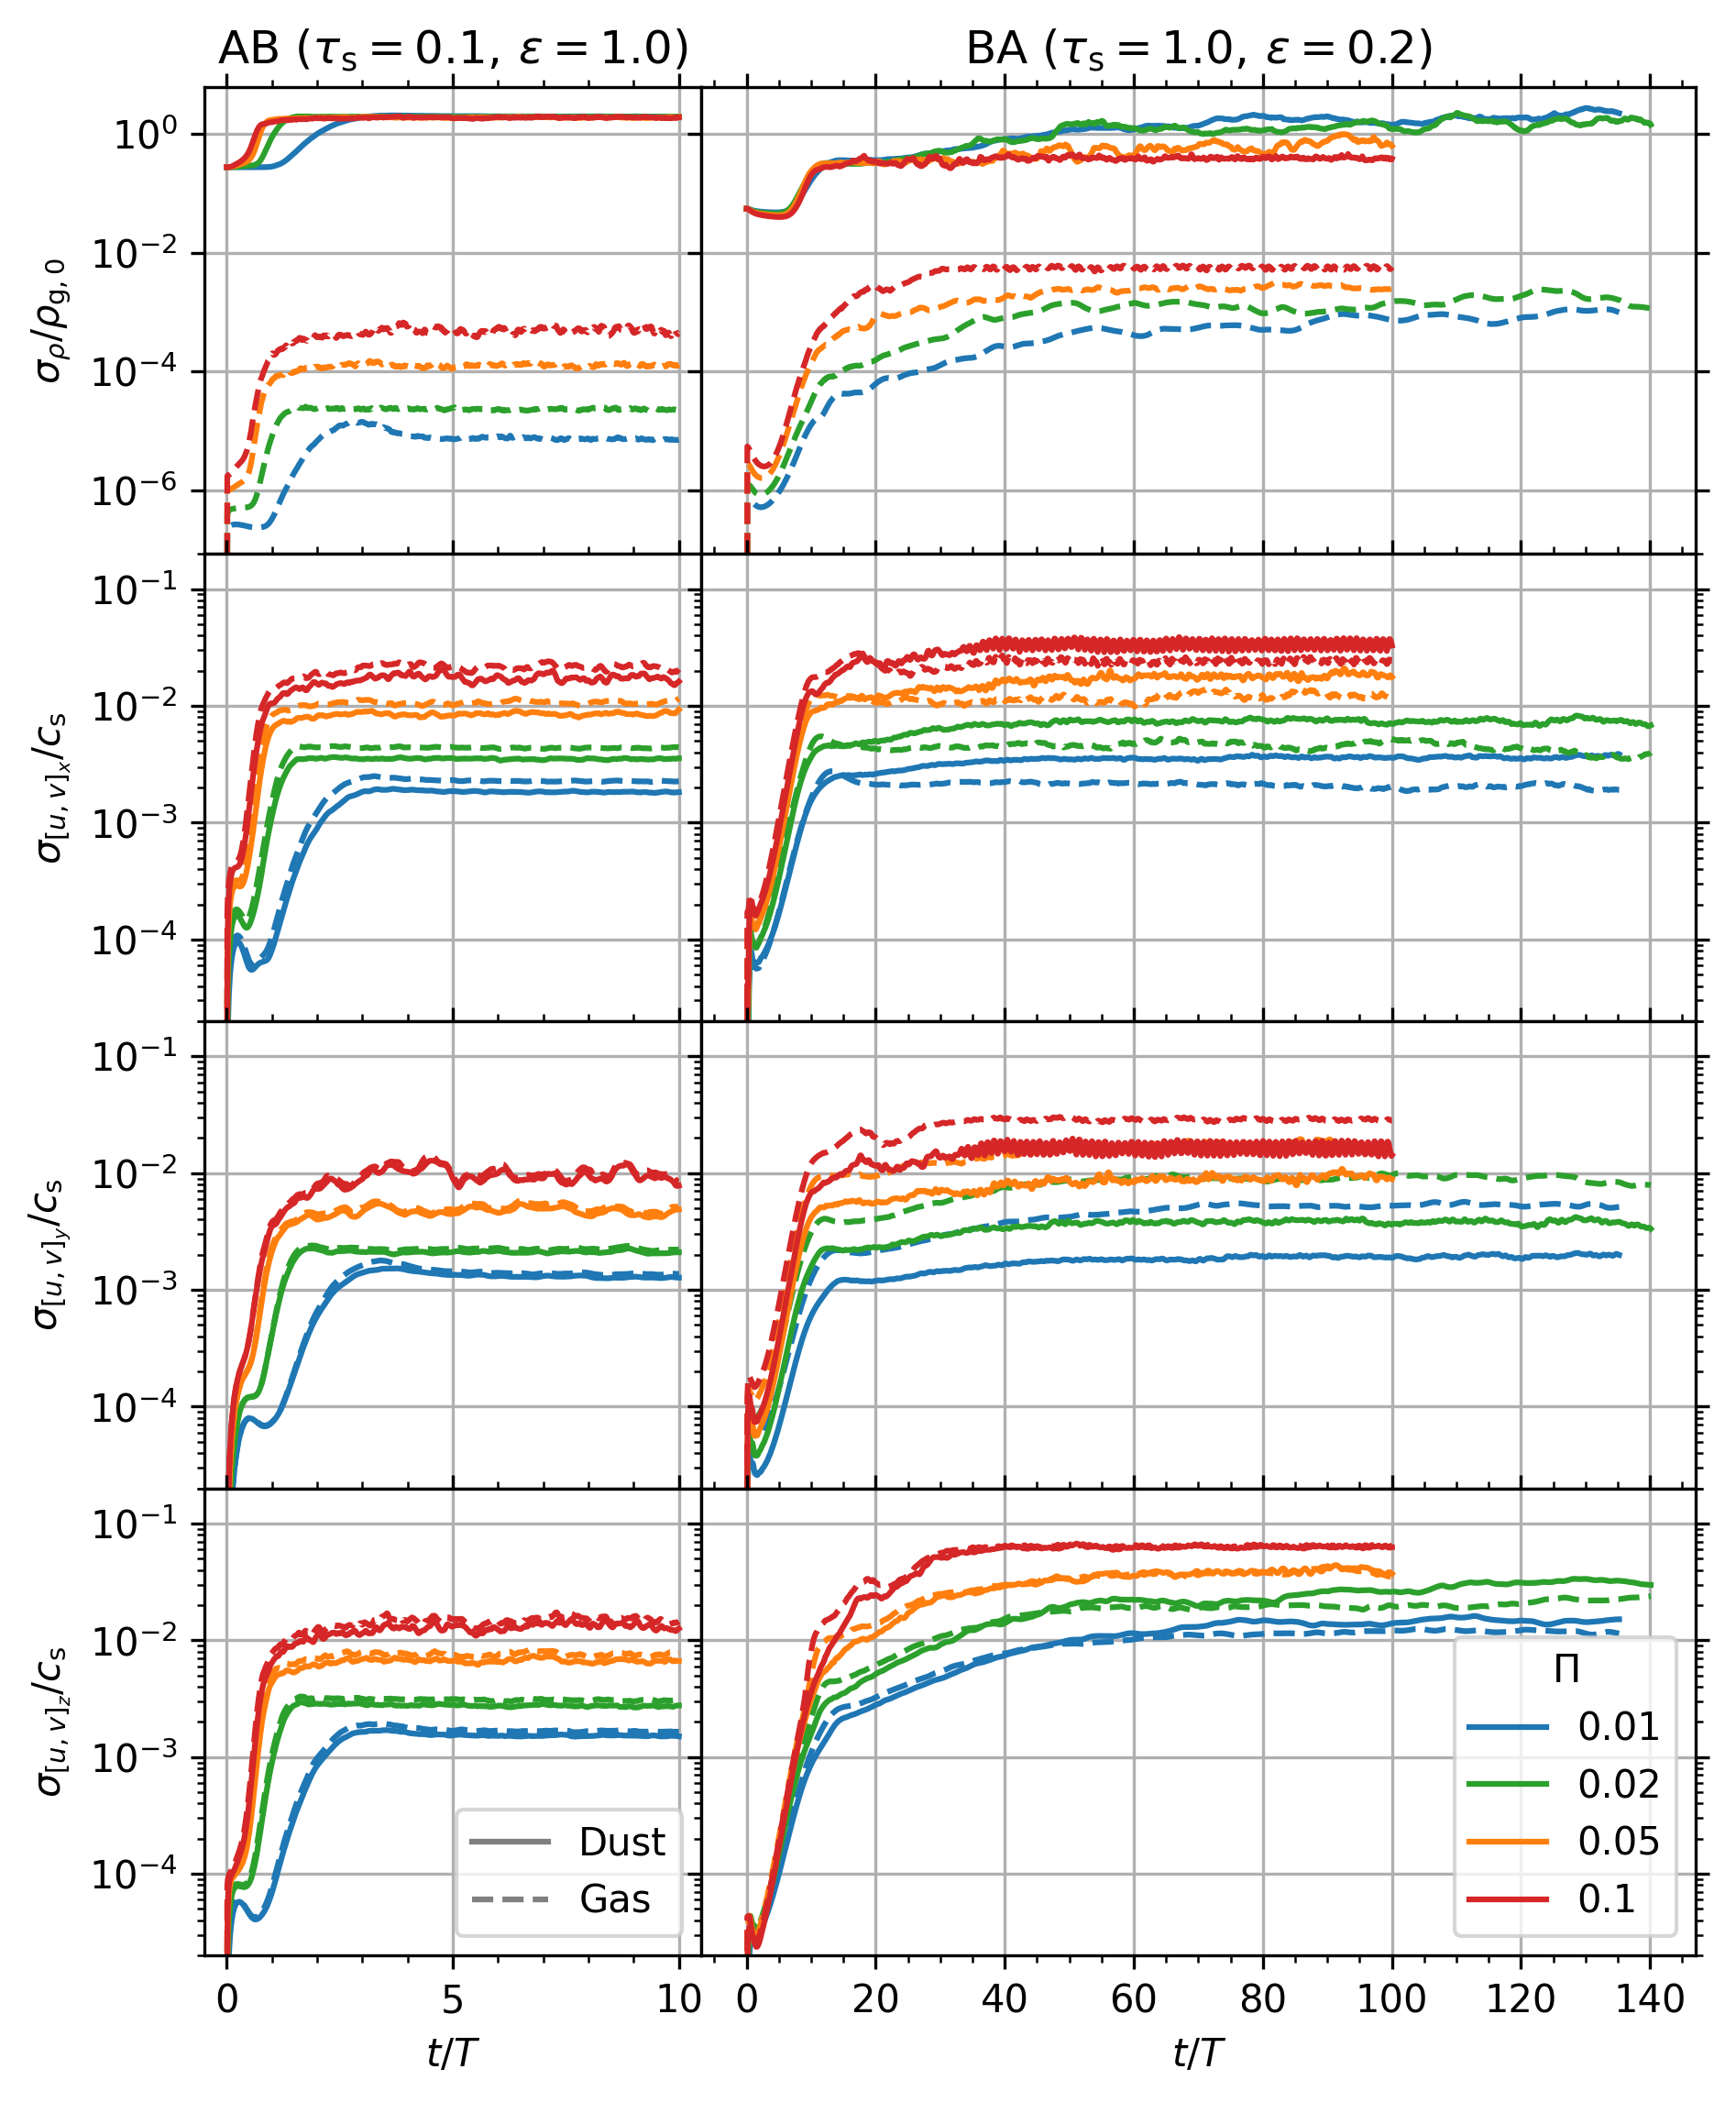

In [2]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def std_err_par(val, err, dec_not=False):
    """
    Formats value-error pair using parenthesis notation.

    *** scientific notation in TeX.

    Parameters
    ----------
    val : float
        ***
    err : float
        ***
    dec_not : bool, optional
        If False, 

    Returns
    -------
    entry
        ***
    """
    val_str, err_str = f'{val:e}', f'{err:e}'
    val_exp, err_exp = int(val_str[-3:]), int(err_str[-3:])
    exp_diff = val_exp - err_exp
    if exp_diff >= 0:
        lsf = 3 + exp_diff
        val_sig = float(val_str[:lsf])
        val_sig = np.format_float_positional(val_sig, precision=exp_diff)
    else: raise Exception('std. err. greater than value')
    err_sig = float(err_str[:-4])
    err_1st = int(float(np.format_float_positional(err_sig, precision=0)))
    exp_str = '{' + str(val_exp) + '}'
    return f'{val_sig}({err_1st}) \\times 10^{exp_str}'

fig, axs = plt.subplots(4, 2, sharex='col', sharey='row', width_ratios=[1,2],
                        figsize=(7, 9), dpi=300)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
psi = 0 # 4 # Plot starting index
vylim = (2e-5, 2e-1)
cols = [[], [], [], [], [], [], [], [], [], [], [], []]

for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect simulation parameters and history file
        athinput = athena_read.athinput(f'{workdir}/{case}/{Pi[0]}/{res}/athinput.si')
        dt = athinput['output3']['dt']
        epsilon = athinput['problem']['epsilon']
        c_s = athinput['hydro']['iso_sound_speed']
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
        Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
        Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
        Mg = Lx*Ly*Lz
        Mp = epsilon*Mg
        hst = athena_read.hst(f'{workdir}/{case}/{Pi[0]}/{res}/output/SI.hst')
        i_sat = 200
        if case == 'AB' and Pi[0] == '0.01': i_sat = 400

        # Compute dispersions, gas velocity deviations, and time averages
        sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
        sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
        sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
        sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)
        sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
        sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
        sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
        sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
        Dux = hst['dux']/Mg
        Duy = hst['duy']/Mg

        for j, col in enumerate(cols):
            if j == 0:
                col.append(case)
            elif j == 1:
                col.append(float(Pi[0]))
            elif j == 2:
                avg = np.mean(sd_rhop[i_sat:])
                err = np.std(sd_rhop[i_sat:])
                col.append(std_err_par(avg, err))
            elif j == 3:
                avg = np.mean(sd_vx[i_sat:])/c_s
                err = np.std(sd_vx[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 4:
                avg = np.mean(sd_vy[i_sat:])/c_s
                err = np.std(sd_vy[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 5:
                avg = np.mean(sd_vz[i_sat:])/c_s
                err = np.std(sd_vz[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 6:
                avg = np.mean(sd_rhog[i_sat:])
                err = np.std(sd_rhog[i_sat:])
                col.append(std_err_par(avg, err, dec_not=True))
            elif j == 7:
                avg = np.mean(sd_ux[i_sat:])/c_s
                err = np.std(sd_ux[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 8:
                avg = np.mean(sd_uy[i_sat:])/c_s
                err = np.std(sd_uy[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 9:
                avg = np.mean(sd_uz[i_sat:])/c_s
                err = np.std(sd_uz[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 10:
                avg = np.mean(Dux[i_sat:])/c_s
                err = np.std(Dux[i_sat:])/c_s
                col.append(std_err_par(avg, err))
            elif j == 11:
                avg = np.mean(Duy[i_sat:])/c_s
                err = np.std(Duy[i_sat:])/c_s
                col.append(std_err_par(avg, err))

        # Plot dispersions
        axs[0][i].semilogy(hst['time'][psi:], sd_rhop[psi:], color=Pi[1],
                           label=Pi[0])
        axs[1][i].semilogy(hst['time'][psi:], sd_vx[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[2][i].semilogy(hst['time'][psi:], sd_vy[psi:]/c_s, color=Pi[1],
                           label=Pi[0])
        axs[3][i].semilogy(hst['time'][psi:], sd_vz[psi:]/c_s,
                                 color=Pi[1], label=float(Pi[0]))
        axs[0][i].semilogy(hst['time'][psi:], sd_rhog[psi:],   color=Pi[1],
                           ls='--')
        axs[1][i].semilogy(hst['time'][psi:], sd_ux[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[2][i].semilogy(hst['time'][psi:], sd_uy[psi:]/c_s, color=Pi[1],
                           ls='--')
        axs[3][i].semilogy(hst['time'][psi:], sd_uz[psi:]/c_s, color=Pi[1],
                           ls='--')

# Plot ghost points for colorless line style and add legends
ls_dust, = axs[3][0].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3][0].semilogy([], [], color='tab:gray', ls='--', label='Gas')
axs[3, 0].legend(handles=[ls_dust, ls_gas], loc='lower right')
axs[3, 1].legend(loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0, 0].set(title=r'AB ($\tau_\mathrm{s}=0.1,\,\epsilon=1.0)$', 
              ylabel=r'$\sigma_\rho/\rho_\mathrm{g,0}$')
axs[0, 1].set(title=r'BA ($\tau_\mathrm{s}=1.0,\,\epsilon=0.2)$')
axs[1, 0].set(ylabel=r'$\sigma_{[u,v]_x}/c_\mathrm{s}$', ylim=vylim)
axs[2, 0].set(ylabel=r'$\sigma_{[u,v]_y}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(ylabel=r'$\sigma_{[u,v]_z}/c_\mathrm{s}$', ylim=vylim)
axs[3, 0].set(xlabel=r'$t/T$')
axs[3, 1].set(xlabel=r'$t/T$')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Case'                                : cols[0],
    r'$\Pi$'                              : cols[1],
    r'$\overline{\sigma_{\rhop}}/\rhogn$' : cols[2],
    r'$\overline{\sigma_{v_x}}/\cs$'      : cols[3],
    r'$\overline{\sigma_{v_y}}/\cs$'      : cols[4],
    r'$\overline{\sigma_{v_z}}/\cs$'      : cols[5],
    r'$\overline{\sigma_{\rhog}}/\rhogn$' : cols[6],
    r'$\overline{\sigma_{u_x}}/\cs$'      : cols[7],
    r'$\overline{\sigma_{u_y}}/\cs$'      : cols[8],
    r'$\overline{\sigma_{u_z}}/\cs$'      : cols[9],
    # r'$\overline{\Delta u_x}/\cs$'        : cols[10],
    # r'$\overline{\Delta u_y}/\cs$'        : cols[11],
    })
df.to_latex(buf='tabs/disps.sty')
df